In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
#import chart_studio.plotly as py
#import plotly.figure_factory as ff
import plotly as py


In [2]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly
#import plotly.plotly as py
from chart_studio import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import KFold

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [8]:
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse

In [9]:
df =  pd.read_csv("cleaned.csv") 
df

,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,work_city,work_state,work_postal,home_city,home_state,home_postal,sex,ethnicity,mar_status,highest_educ_lvl,age,classification,age_group,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,INDIO,CA,92201.0,COACHELLA,CA,92236.0,F,NSPEC,U,A,34.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,RIVERSIDE,CA,92507.0,HEMET,CA,92544.0,F,NSPEC,U,A,32.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,MORENO VALLEY,CA,92553.0,MONTCLAIR,CA,91763.0,F,NSPEC,U,A,33.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86556,9/26/2019,12/13/2019,78,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,32,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,55.0,Supervisor,55_to_59,Retirement,Service,over_5,over_5,0,1,0,1,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa
86557,7/1/1998,1/1/2001,915,Self Sufficiency,Public Social Services,ELIGIBILITY TECHNICIAN I,11,1002,NaN,NaN,LAKE ELSINORE,CA,92530.0,NaN,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,Staff,NaN,NaN,NaN,1_to_2,1_to_2,1,1,1,1,10/5/2021 10:08,9b67a1a4ee52383d86f783c68b12a6fa
86558,7/9/2001,1/21/2004,926,Other,Other,TEMPORARY ASSISTANT,13,2030,NaN,NaN,RIVERSIDE,CA,92501.0,NaN,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,Staff,NaN,Termination,End Temporary Employment,1_to_2,1_to_2,1,0,1,0,10/5/2021 10:08,9b67a1a4ee52383d86f783c68b12a6fa
86559,3/4/2004,8/30/2006,909,Other,Other,TEMPORARY ASSISTANT,15,2030,NaN,NaN,RIVERSIDE,CA,92501.0,NaN,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,Staff,NaN,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,9b67a1a4ee52383d86f783c68b12a6fa


In [10]:
df.columns

Index(['start_date', 'end_date', 'duration', 'division', 'department',
       'jobtitle', 'comprate', 'work_location', 'work_address1',
       'work_address2', 'work_city', 'work_state', 'work_postal', 'home_city',
       'home_state', 'home_postal', 'sex', 'ethnicity', 'mar_status',
       'highest_educ_lvl', 'age', 'classification', 'age_group', 'event',
       'event_reason', 'tenure_group_by_department',
       'tenure_group_by_division', 'deptartment_joiners',
       'deptartment_leavers', 'division_joiners', 'division_leavers',
       'sysdate', 'emplid_sec'],
      dtype='object')

In [11]:
df.head()

,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,work_city,work_state,work_postal,home_city,home_state,home_postal,sex,ethnicity,mar_status,highest_educ_lvl,age,classification,age_group,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,INDIO,CA,92201.0,COACHELLA,CA,92236.0,F,NSPEC,U,A,34.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,RIVERSIDE,CA,92507.0,HEMET,CA,92544.0,F,NSPEC,U,A,32.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,MORENO VALLEY,CA,92553.0,MONTCLAIR,CA,91763.0,F,NSPEC,U,A,33.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d


In [12]:
#df.loc[((df['end_date'].notnull())), 'Attrition'] = 0
#df.loc[((df['end_date'].isna())), 'Attrition'] = 1
#df
df['Attrition'] = df['end_date'].isnull().groupby(df['emplid_sec']).transform('sum')
df

,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,work_city,work_state,work_postal,home_city,home_state,home_postal,sex,ethnicity,mar_status,highest_educ_lvl,age,classification,age_group,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec,Attrition
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,INDIO,CA,92201.0,COACHELLA,CA,92236.0,F,NSPEC,U,A,34.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19,1
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,RIVERSIDE,CA,92507.0,HEMET,CA,92544.0,F,NSPEC,U,A,32.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13,1
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,MORENO VALLEY,CA,92553.0,MONTCLAIR,CA,91763.0,F,NSPEC,U,A,33.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86556,9/26/2019,12/13/2019,78,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,32,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,55.0,Supervisor,55_to_59,Retirement,Service,over_5,over_5,0,1,0,1,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0
86557,7/1/1998,1/1/2001,915,Self Sufficiency,Public Social Services,ELIGIBILITY TECHNICIAN I,11,1002,NaN,NaN,LAKE ELSINORE,CA,92530.0,NaN,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,Staff,NaN,NaN,NaN,1_to_2,1_to_2,1,1,1,1,10/5/2021 10:08,9b67a1a4ee52383d86f783c68b12a6fa,0
86558,7/9/2001,1/21/2004,926,Other,Other,TEMPORARY ASSISTANT,13,2030,NaN,NaN,RIVERSIDE,CA,92501.0,NaN,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,Staff,NaN,Termination,End Temporary Employment,1_to_2,1_to_2,1,0,1,0,10/5/2021 10:08,9b67a1a4ee52383d86f783c68b12a6fa,0
86559,3/4/2004,8/30/2006,909,Other,Other,TEMPORARY ASSISTANT,15,2030,NaN,NaN,RIVERSIDE,CA,92501.0,NaN,NaN,NaN,NaN,WHITE,NaN,NaN,NaN,Staff,NaN,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,9b67a1a4ee52383d86f783c68b12a6fa,0


In [13]:
df_age_nonnull = df.dropna(subset=['age'], how='all')
df_age_nonnull

,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,work_city,work_state,work_postal,home_city,home_state,home_postal,sex,ethnicity,mar_status,highest_educ_lvl,age,classification,age_group,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec,Attrition
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,INDIO,CA,92201.0,COACHELLA,CA,92236.0,F,NSPEC,U,A,34.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19,1
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,RIVERSIDE,CA,92507.0,HEMET,CA,92544.0,F,NSPEC,U,A,32.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13,1
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,MORENO VALLEY,CA,92553.0,MONTCLAIR,CA,91763.0,F,NSPEC,U,A,33.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,12/29/2011,4/18/2012,111,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,25,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,47.0,Supervisor,45_to_49,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0
86553,4/19/2012,3/19/2014,699,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,27,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,49.0,Supervisor,45_to_49,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0
86554,3/20/2014,10/11/2017,1301,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,31,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,52.0,Supervisor,50_to_54,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0
86555,10/12/2017,9/25/2019,713,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,32,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,54.0,Supervisor,50_to_54,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0


In [14]:
(mu, sigma) = norm.fit(df_age_nonnull.loc[df_age_nonnull['Attrition'] == 1, 'age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_age_nonnull.loc[df_age_nonnull['Attrition'] == 0, 'age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = 37.7 years old and standard deviation = 9.2
Current exmployees: average age = 41.3 years old and standard deviation = 12.2


In [15]:
x1 = df_age_nonnull.loc[df_age_nonnull['Attrition'] == 0, 'age']
x2 = df_age_nonnull.loc[df_age_nonnull['Attrition'] == 1, 'age']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Age Distribution in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[15, 60], dtick=5))
py.offline.plot(fig, filename='Distplot with Multiple Datasets')

c:\users\smitm\appdata\local\programs\python\python37\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

<AxesSubplot:title={'center':'Leavers by Education Field (%)'}, xlabel='Field'>

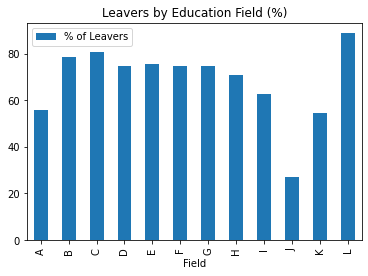

In [16]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_age_nonnull['highest_educ_lvl'].unique()):
    ratio = df_age_nonnull[(df_age_nonnull['highest_educ_lvl']==field)&(df_age_nonnull['Attrition']==1)].shape[0] / df_age_nonnull[df_age_nonnull['highest_educ_lvl']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio100))
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

In [17]:
# A(Not indicated), B(Less than HS), C(HS graduate), D(Some college), E(Technical school) F(2-year college degree)
# G(Bachelor's degree), H(Some graduate school), I(Master's degree), J(Doctorate-Academic), K(Doctorate-Professional, L(NA)

In [18]:
df_age_nonnull['sex'].value_counts()

F    62603
M    12439
U        1
Name: sex, dtype: int64

In [19]:
print("Normalised sex distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_age_nonnull[(df_age_nonnull['Attrition'] == 1) & (
    df_age_nonnull['sex'] == 'M')].shape[0] / df_age_nonnull[df_age_nonnull['sex'] == 'M'].shape[0])*100, (df_age_nonnull[(df_age_nonnull['Attrition'] == 1) & (df_age_nonnull['sex'] == 'F')].shape[0] / df_age_nonnull[df_age_nonnull['sex'] == 'F'].shape[0])*100))

Normalised sex distribution of ex-employees in the dataset: Male = 53.6%; Female 58.1%.


<AxesSubplot:title={'center':'Leavers by sex (%)'}, xlabel='sex'>

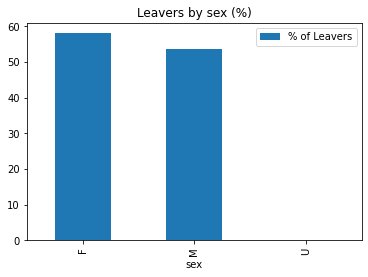

In [20]:
df_sex = pd.DataFrame(columns=["sex", "% of Leavers"])
i=0
for field in list(df_age_nonnull['sex'].unique()):
    ratio = df_age_nonnull[(df_age_nonnull['sex']==field)&(df_age_nonnull['Attrition']==1)].shape[0] / df_age_nonnull[df_age_nonnull['sex']==field].shape[0]
    df_sex.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_sex.groupby(by="sex").sum()
df_G.plot(kind='bar',title='Leavers by sex (%)')

In [21]:
df_age_nonnull['mar_status'].value_counts()

U    45429
S    28473
M      931
D      196
H       10
W        2
E        2
Name: mar_status, dtype: int64

<AxesSubplot:title={'center':'Leavers by Marital Status (%)'}, xlabel='Marital Status'>

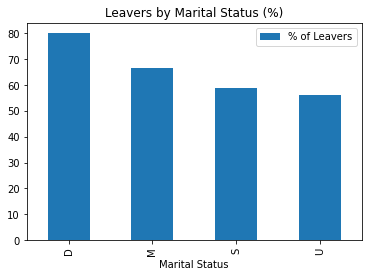

In [22]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
mar_values = ['H','E','W']
df_marital_drop = df_age_nonnull[df_age_nonnull['mar_status'].isin(mar_values) == False]

for field in list(df_marital_drop['mar_status'].unique()):
    ratio = df_marital_drop[(df_marital_drop['mar_status']==field)&(df_marital_drop['Attrition']==1)].shape[0] / df_marital_drop[df_marital_drop['mar_status']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100)) 
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.plot(kind='bar',title='Leavers by Marital Status (%)')

In [23]:
df_age_nonnull['division'].value_counts()

Self Sufficiency           33321
Children Services          23141
Administrative Services     6372
Adult Services              5813
Other                       5410
Public Authority             627
Finance and Forecasting      359
Name: division, dtype: int64

In [24]:
df_division = pd.DataFrame(columns=["division", "division_leavers"])
i=0
for field in list(df_age_nonnull['division'].unique()):
    ratio = df_age_nonnull[(df_age_nonnull['division']==field)&(df_age_nonnull['Attrition']==1)].shape[0] / df_age_nonnull[df_age_nonnull['division']==field].shape[0]
    df_division.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_DF = df_division.groupby(by="division").sum()
df_DF.iplot(kind='bar',title='Leavers by Division (%)')

In [25]:
df_age_nonnull['jobtitle'].value_counts()

ELIGIBILITY TECHNICIAN II        10485
SOCIAL SVCS PRACTITIONER III      9081
ELIGIBILITY TECHNICIAN I          7186
OFFICE ASSISTANT III              5853
OFFICE ASSISTANT II               4035
                                 ...  
IT COMMUNICATIONS ANALYST II         1
AUDITOR/APPRAISER II                 1
SR AUDITOR/APPRAISER                 1
TELEPHONE RPT UNIT OFFICER II        1
PUBLIC GUARDIAN INVESTIGATOR         1
Name: jobtitle, Length: 432, dtype: int64

In [26]:
df_jobtitle = pd.DataFrame(columns=["jobtitle", "division_leavers"])
i=0
for field in list(df_age_nonnull['jobtitle'].unique()):
    ratio = df_age_nonnull[(df_age_nonnull['jobtitle']==field)&(df_age_nonnull['Attrition']==1)].shape[0] / df_age_nonnull[df_age_nonnull['jobtitle']==field].shape[0]
    df_jobtitle.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_jobtitle.groupby(by="jobtitle").sum()
df_JR.iplot(kind='bar',title='Leavers by Job Role (%)')

In [27]:
jobtitle_top_50 = df_age_nonnull[df_age_nonnull.jobtitle.isin(df_age_nonnull.jobtitle.value_counts()[df_age_nonnull.jobtitle.value_counts()>115].index)]['jobtitle']
df_jobtitle = pd.DataFrame(columns=["jobtitle", "division_leavers"])
i=0
for field in list(jobtitle_top_50.unique()):
    ratio = df_age_nonnull[(df_age_nonnull['jobtitle']==field)&(df_age_nonnull['Attrition']==1)].shape[0] / df_age_nonnull[df_age_nonnull['jobtitle']==field].shape[0]
    df_jobtitle.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_jobtitle.groupby(by="jobtitle").sum()
df_JR.iplot(kind='bar',title='Leavers by Job Role (%)')

In [28]:
df_age_nonnull

,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,work_city,work_state,work_postal,home_city,home_state,home_postal,sex,ethnicity,mar_status,highest_educ_lvl,age,classification,age_group,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec,Attrition
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,INDIO,CA,92201.0,COACHELLA,CA,92236.0,F,NSPEC,U,A,34.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19,1
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,RIVERSIDE,CA,92507.0,HEMET,CA,92544.0,F,NSPEC,U,A,32.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13,1
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,MORENO VALLEY,CA,92553.0,MONTCLAIR,CA,91763.0,F,NSPEC,U,A,33.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,12/29/2011,4/18/2012,111,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,25,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,47.0,Supervisor,45_to_49,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0
86553,4/19/2012,3/19/2014,699,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,27,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,49.0,Supervisor,45_to_49,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0
86554,3/20/2014,10/11/2017,1301,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,31,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,52.0,Supervisor,50_to_54,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0
86555,10/12/2017,9/25/2019,713,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,32,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,54.0,Supervisor,50_to_54,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0


In [29]:
df_age_nonnull['duration_sum'] = df_age_nonnull['duration'].groupby(df_age_nonnull['emplid_sec']).transform('sum')
df_age_nonnull

,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,work_city,work_state,work_postal,home_city,home_state,home_postal,sex,ethnicity,mar_status,highest_educ_lvl,age,classification,age_group,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec,Attrition,duration_sum
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,INDIO,CA,92201.0,COACHELLA,CA,92236.0,F,NSPEC,U,A,34.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19,1,12
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1,25
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1,25
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,RIVERSIDE,CA,92507.0,HEMET,CA,92544.0,F,NSPEC,U,A,32.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13,1,26
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,MORENO VALLEY,CA,92553.0,MONTCLAIR,CA,91763.0,F,NSPEC,U,A,33.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86552,12/29/2011,4/18/2012,111,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,25,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,47.0,Supervisor,45_to_49,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0,7233
86553,4/19/2012,3/19/2014,699,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,27,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,49.0,Supervisor,45_to_49,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0,7233
86554,3/20/2014,10/11/2017,1301,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,31,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,52.0,Supervisor,50_to_54,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0,7233
86555,10/12/2017,9/25/2019,713,Self Sufficiency,Public Social Services,ELIGIBILITY SUPERVISOR,32,3038,NaN,NaN,BANNING,CA,92220.0,BANNING,CA,92220.0,F,WHITE,U,A,54.0,Supervisor,50_to_54,NaN,NaN,over_5,over_5,0,0,0,0,10/5/2021 10:08,b6a14f3c061404d4d6c79f8813317afa,0,7233


In [30]:
#print('Average Number of Days at the company for currently active employees: {:.2f} days and ex-employees: {:.2f} days'.format(
    #df_age_nonnull[df_age_nonnull['Attrition'] == 0]['duration'].mean(), df_age_nonnull[df_age_nonnull['Attrition'] == 1]['duration'].mean()))

In [31]:
#print("Number of Days at the company varies from {} to {} days.".format(
    #df_age_nonnull['duration'].min(), df_age_nonnull['duration'].max()))

In [32]:
#df.loc[df['emplid_sec'] == '22eed54aa17272c95880ff0f424c9a75']

In [33]:
df_age_nonnull['duration_sum'] = df_age_nonnull['duration'].groupby(df_age_nonnull['emplid_sec']).transform('sum')
df_age_nonnull['duration_years'] = df_age_nonnull['duration_sum']/365

In [34]:
x1 = df_age_nonnull.loc[df_age_nonnull['Attrition'] == 0, 'duration_years']
x2 = df_age_nonnull.loc[df_age_nonnull['Attrition'] == 1, 'duration_years']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Years At Company in Percent by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 25], dtick=5))
# Plot
plot(fig, filename='Years at Company')

c:\users\smitm\appdata\local\programs\python\python37\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `Years at Company` didn't end with .html. Adding .html to the end of your file.



'Years at Company.html'

In [35]:
#df_age_nonnull['duration_years'] = df_age_nonnull['duration_sum']/365
print("Employee Hourly Rate varies from ${} to ${}.".format(
df_age_nonnull['comprate'].min(), df_age_nonnull['comprate'].max()))                                              

Employee Hourly Rate varies from $0 to $141.


In [36]:
x1 = df_age_nonnull.loc[df_age_nonnull['Attrition'] == 0, 'comprate']
x2 = df_age_nonnull.loc[df_age_nonnull['Attrition'] == 1, 'comprate']
# Group data together
hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,
                         curve_type='kde', show_hist=False, show_rug=False)
# Add title
fig['layout'].update(title='Hourly Income by Attrition Status')
fig['layout'].update(xaxis=dict(range=[0, 141], dtick=20))
# Plot
plot(fig, filename='Distplot with Multiple Datasets')

c:\users\smitm\appdata\local\programs\python\python37\lib\site-packages\plotly\offline\offline.py:563: UserWarning:

Your filename `Distplot with Multiple Datasets` didn't end with .html. Adding .html to the end of your file.



'Distplot with Multiple Datasets.html'

In [37]:
df_age_nonnull['Attrition'].value_counts()

1    43020
0    32023
Name: Attrition, dtype: int64

In [38]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_age_nonnull[df_age_nonnull['Attrition'] == 0].shape[0] / df_age_nonnull.shape[0]*100,
    df_age_nonnull[df_age_nonnull['Attrition'] == 1].shape[0] / df_age_nonnull.shape[0]*100))
#df['Attrition'] = df['end_date'].isnull().groupby(df['emplid_sec']).transform('sum')

Percentage of Current Employees is 42.7% and of Ex-employees is: 57.3%


In [39]:
df_age_nonnull['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

In [40]:
df_age_nonnull_trans = df_age_nonnull.copy()
df_age_nonnull_trans['Target'] = df_age_nonnull_trans['Attrition'].apply(
    lambda x: 0 if x == 0 else 1)
df_age_nonnull_trans = df_age_nonnull_trans.drop(
    ['Attrition', 'work_address1', 'work_address2', 'work_state', 'sysdate' , 'emplid_sec', 'duration'], axis=1)
correlations = df_age_nonnull_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 home_postal       0.046867
comprate          0.112718
duration_sum      0.299303
duration_years    0.299303
Target            1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 deptartment_leavers   -0.264665
division_leavers      -0.233439
age                   -0.164435
deptartment_joiners   -0.138134
division_joiners      -0.124552
Name: Target, dtype: float64


<AxesSubplot:>

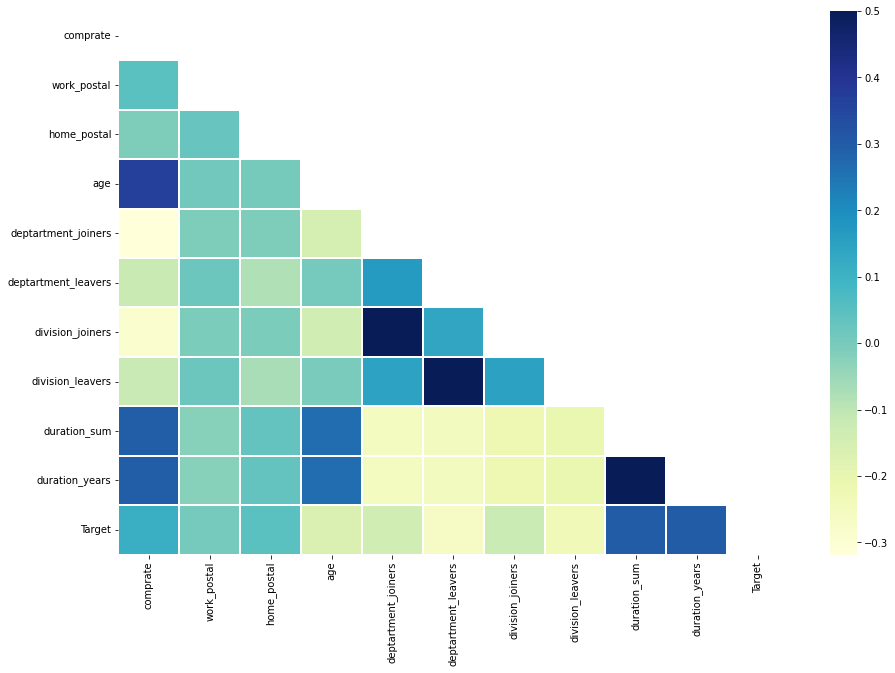

In [41]:
corr = df_age_nonnull_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [43]:
print(df_age_nonnull.shape)
df_age_nonnull.head()

(75043, 36)


,start_date,end_date,duration,division,department,jobtitle,comprate,work_location,work_address1,work_address2,work_city,work_state,work_postal,home_city,home_state,home_postal,sex,ethnicity,mar_status,highest_educ_lvl,age,classification,age_group,event,event_reason,tenure_group_by_department,tenure_group_by_division,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,sysdate,emplid_sec,Attrition,duration_sum,duration_years
0,9/23/2021,NaN,12,Children Services,Public Social Services,OFFICE ASSISTANT III,15,4105,NaN,NaN,INDIO,CA,92201.0,COACHELLA,CA,92236.0,F,NSPEC,U,A,34.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,5bcf08186d3be1f86b89634d853b5b19,1,12,0.032877
1,9/9/2021,9/22/2021,13,Children Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37209,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,1,0,1,1,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1,25,0.068493
2,9/23/2021,NaN,12,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,39,6208-37200,NaN,NaN,RIVERSIDE,CA,92505.0,RIVERSIDE,CA,92508.0,F,NSPEC,U,A,46.0,Staff,45_to_49,NaN,NaN,under_1,under_1,0,0,1,0,10/5/2021 10:08,4b595276afa5421bba453b3ec6b933f9,1,25,0.068493
3,9/9/2021,NaN,26,Administrative Services,Public Social Services,CUSTOMER SUPPORT REP II,20,2091,NaN,NaN,RIVERSIDE,CA,92507.0,HEMET,CA,92544.0,F,NSPEC,U,A,32.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,16f8585a55693256463ab4c624638d13,1,26,0.071233
4,9/9/2021,NaN,26,Adult Services,Public Social Services,SOCIAL SVCS PRACTITIONER III,27,4285-37201,NaN,NaN,MORENO VALLEY,CA,92553.0,MONTCLAIR,CA,91763.0,F,NSPEC,U,A,33.0,Staff,30_to_34,NaN,NaN,under_1,under_1,1,0,1,0,10/5/2021 10:08,2293e9c743fb373ead0bd904a7b02b2d,1,26,0.071233


In [44]:
le_count = 0
for col in df_age_nonnull.columns[1:]:
    if df_age_nonnull[col].dtype == 'object':
        if len(list(df_age_nonnull[col].unique())) <= 2:
            le.fit(df_age_nonnull[col])
            df_age_nonnull[col] = le.transform(df_age_nonnull[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [45]:
df_age_nonnull_drop = df_age_nonnull.copy()
df_age_nonnull_drop = df_age_nonnull_drop.drop(
    ['work_address1', 'work_address2', 'work_state', 'sysdate', 'emplid_sec', 'duration','start_date','end_date','home_city','work_city','work_location','home_state'], axis=1)

In [46]:
df_age_nonnull_drop = pd.get_dummies(df_age_nonnull_drop, drop_first=True)

In [47]:
print(df_age_nonnull_drop.shape)
df_age_nonnull_drop.head()

(75043, 514)


,department,comprate,work_postal,home_postal,age,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,Attrition,duration_sum,duration_years,division_Adult Services,division_Children Services,division_Finance and Forecasting,division_Other,division_Public Authority,division_Self Sufficiency,jobtitle_ACCOUNTANT II,jobtitle_ACCOUNTANT II - CE,jobtitle_ACCOUNTANT TRAINEE,jobtitle_ACCOUNTING ASSISTANT I,jobtitle_ACCOUNTING ASSISTANT II,jobtitle_ACCOUNTING ASSISTANT II - C,jobtitle_ACCOUNTING TECHNICIAN I,jobtitle_ACCOUNTING TECHNICIAN I - CN,jobtitle_ACCOUNTING TECHNICIAN II,jobtitle_ACCOUNTING TECHNICIAN II-PARKS,jobtitle_ACR TECHNICIAN I,jobtitle_ACR TECHNICIAN II,jobtitle_ACR TECHNICIAN TRAINEE,jobtitle_ADMIN ANALYST (D),jobtitle_ADMIN SVCS ANALYST I,jobtitle_ADMIN SVCS ANALYST II,jobtitle_ADMIN SVCS ASST,jobtitle_ADMIN SVCS MGR I,jobtitle_ADMIN SVCS MGR II,jobtitle_ADMIN SVCS MGR III,jobtitle_ADMIN SVCS OFFICER,jobtitle_ADMIN SVCS SUPV,jobtitle_ADMISSIONS & COLLECTIONS CLERK,jobtitle_AG INSPECTOR,jobtitle_AGENCY PROGRAM ADMINISTRATOR,jobtitle_ANIMAL ADOPTION COUNSELOR,jobtitle_ANIMAL LICENSE INSPECTOR,jobtitle_APPEALS SPECIALIST,jobtitle_APPLICATIONS DEVELOPMENT,jobtitle_APPLICATIONS DEVELOPMENT-S,jobtitle_AQUATICS TECHNICIAN - PARKS,jobtitle_ARCHIVES & RECORDS TECH,jobtitle_ARCHIVES & RECORDS TECH TRNE,jobtitle_ASST CEO EXECUTIVE ASSISTANT,"jobtitle_ASST CEO-HR, TLMA, HS, CIO/IS",jobtitle_ASST COMMUNICABLE DISEASE SPEC,"jobtitle_ASST DIR OF B & C SVCS, HHPWS",jobtitle_ASST DIR OF PUBLIC SOCIAL SVCS,"jobtitle_ASST DIR, FACILITIES MGMT",jobtitle_ASST REG MANAGER,jobtitle_AUDITOR/APPRAISER I,jobtitle_AUDITOR/APPRAISER II,jobtitle_BEHAVIORAL HEALTH SVC SUPV,jobtitle_BEHAVIORAL HLTH SPECIALIST II,jobtitle_BEHAVIORAL HLTH SPECIALIST III,jobtitle_BEHAVIORAL HLTH SPECIALIST IV,jobtitle_BOARD ASSISTANT,jobtitle_BUSINESS PROCESS ANALYST I,jobtitle_BUSINESS PROCESS ANALYST II,jobtitle_BUSINESS PROCESS MGR,jobtitle_BUSINESS SYSTEMS ANALYSIS,jobtitle_BUSINESS SYSTEMS ANALYSIS - S,jobtitle_BUYER ASSISTANT,jobtitle_BUYER I,jobtitle_BUYER II,jobtitle_BUYER TRAINEE,jobtitle_CA CHILDREN SVCS TECH I,jobtitle_CA CHILDREN SVCS TECH II,jobtitle_CA CHILDREN SVCS TECH TRAINEE,jobtitle_CERTIFIED MEDICAL ASSISTANT,"jobtitle_CHF FINANCE OFFICER, DPSS",jobtitle_CHILD SUPPORT INTERVIEWER,jobtitle_CHILD SUPPORT SPECIALIST,jobtitle_CHILDREN'S SOCIAL SVC WKR III,jobtitle_CHILDREN'S SOCIAL SVC WKR IV,jobtitle_CHILDREN'S SS SUPV II-BLYTHE,jobtitle_CHILDREN'S SSW III - BLYTHE,jobtitle_CHILDREN'S SSW IV - BLYTHE,jobtitle_CHILDREN'S SSW V - BLYTHE,jobtitle_CLINICAL THERAPIST I,jobtitle_CLINICAL THERAPIST II,jobtitle_CODE ENFORCEMENT AIDE,jobtitle_CODE ENFORCEMENT OFFICER I,jobtitle_CODE ENFORCEMENT OFFICER II,jobtitle_CODE ENFORCEMENT OFFICER II(D),jobtitle_COMMISSION/ADVISORY GRP MEMBER,jobtitle_COMMUNICABLE DISEASES SPEC,jobtitle_COMMUNICATIONS ANALYSIS,jobtitle_COMMUNICATIONS ANALYSIS - S,jobtitle_COMMUNITY ACTION PROGRAM SUPV,jobtitle_COMMUNITY PROGRAM SPEC I,jobtitle_COMMUNITY PROGRAM SPEC II,jobtitle_COMMUNITY SERVICES ASSISTANT,jobtitle_COMMUNITY SERVICES OFFICER I,jobtitle_COMMUNITY SERVICES OFFICER II,jobtitle_COMPUTER BASED TRAINING OFFCR,jobtitle_COMPUTER BASED TRAINING SUPV,jobtitle_CONTRACTS & GRANTS ANALYST,jobtitle_CORONER TECHNICIAN,jobtitle_CORRECTIONAL DEPUTY I,jobtitle_CORRECTIONAL SR FOOD SVC WRKR,jobtitle_COUNTY TEMPORARY,jobtitle_COURT ACCOUNTING ASSISTANT,jobtitle_COURT EVALUATOR,jobtitle_COURT PRINCIPAL FISCAL ANALYST,jobtitle_COURT PROF STUDENT INTERN,jobtitle_COURT SECRETARY I,jobtitle_COURT SVCS ASSISTANT I,jobtitle_COURT SVCS ASSISTANT II,jobtitle_COURT SVCS INVESTIGATOR,jobtitle_CROSSING GUARD,jobtitle_CUSTODIAN,jobtitle_CUSTOMER SUPPORT REP I,jobtitle_CUSTOMER SUPPORT REP II,jobtitle_CUSTOMER SUPPORT REP III,jobtitle_D.A. SECRETARY,jobtitle_DATA ENTRY OPERATOR II,jobtitle_DATABASE ADMINISTRATION,jobtitle_DEP AG COMMISSIONER-SEALER,jobtitle_DEP DIR OF NATURAL RESOURCES,jobtitle_DEP DIR OF PUBLIC SOCIAL SVCS,jobtit

In [48]:
df_age_nonnull_drop.head()

,department,comprate,work_postal,home_postal,age,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,Attrition,duration_sum,duration_years,division_Adult Services,division_Children Services,division_Finance and Forecasting,division_Other,division_Public Authority,division_Self Sufficiency,jobtitle_ACCOUNTANT II,jobtitle_ACCOUNTANT II - CE,jobtitle_ACCOUNTANT TRAINEE,jobtitle_ACCOUNTING ASSISTANT I,jobtitle_ACCOUNTING ASSISTANT II,jobtitle_ACCOUNTING ASSISTANT II - C,jobtitle_ACCOUNTING TECHNICIAN I,jobtitle_ACCOUNTING TECHNICIAN I - CN,jobtitle_ACCOUNTING TECHNICIAN II,jobtitle_ACCOUNTING TECHNICIAN II-PARKS,jobtitle_ACR TECHNICIAN I,jobtitle_ACR TECHNICIAN II,jobtitle_ACR TECHNICIAN TRAINEE,jobtitle_ADMIN ANALYST (D),jobtitle_ADMIN SVCS ANALYST I,jobtitle_ADMIN SVCS ANALYST II,jobtitle_ADMIN SVCS ASST,jobtitle_ADMIN SVCS MGR I,jobtitle_ADMIN SVCS MGR II,jobtitle_ADMIN SVCS MGR III,jobtitle_ADMIN SVCS OFFICER,jobtitle_ADMIN SVCS SUPV,jobtitle_ADMISSIONS & COLLECTIONS CLERK,jobtitle_AG INSPECTOR,jobtitle_AGENCY PROGRAM ADMINISTRATOR,jobtitle_ANIMAL ADOPTION COUNSELOR,jobtitle_ANIMAL LICENSE INSPECTOR,jobtitle_APPEALS SPECIALIST,jobtitle_APPLICATIONS DEVELOPMENT,jobtitle_APPLICATIONS DEVELOPMENT-S,jobtitle_AQUATICS TECHNICIAN - PARKS,jobtitle_ARCHIVES & RECORDS TECH,jobtitle_ARCHIVES & RECORDS TECH TRNE,jobtitle_ASST CEO EXECUTIVE ASSISTANT,"jobtitle_ASST CEO-HR, TLMA, HS, CIO/IS",jobtitle_ASST COMMUNICABLE DISEASE SPEC,"jobtitle_ASST DIR OF B & C SVCS, HHPWS",jobtitle_ASST DIR OF PUBLIC SOCIAL SVCS,"jobtitle_ASST DIR, FACILITIES MGMT",jobtitle_ASST REG MANAGER,jobtitle_AUDITOR/APPRAISER I,jobtitle_AUDITOR/APPRAISER II,jobtitle_BEHAVIORAL HEALTH SVC SUPV,jobtitle_BEHAVIORAL HLTH SPECIALIST II,jobtitle_BEHAVIORAL HLTH SPECIALIST III,jobtitle_BEHAVIORAL HLTH SPECIALIST IV,jobtitle_BOARD ASSISTANT,jobtitle_BUSINESS PROCESS ANALYST I,jobtitle_BUSINESS PROCESS ANALYST II,jobtitle_BUSINESS PROCESS MGR,jobtitle_BUSINESS SYSTEMS ANALYSIS,jobtitle_BUSINESS SYSTEMS ANALYSIS - S,jobtitle_BUYER ASSISTANT,jobtitle_BUYER I,jobtitle_BUYER II,jobtitle_BUYER TRAINEE,jobtitle_CA CHILDREN SVCS TECH I,jobtitle_CA CHILDREN SVCS TECH II,jobtitle_CA CHILDREN SVCS TECH TRAINEE,jobtitle_CERTIFIED MEDICAL ASSISTANT,"jobtitle_CHF FINANCE OFFICER, DPSS",jobtitle_CHILD SUPPORT INTERVIEWER,jobtitle_CHILD SUPPORT SPECIALIST,jobtitle_CHILDREN'S SOCIAL SVC WKR III,jobtitle_CHILDREN'S SOCIAL SVC WKR IV,jobtitle_CHILDREN'S SS SUPV II-BLYTHE,jobtitle_CHILDREN'S SSW III - BLYTHE,jobtitle_CHILDREN'S SSW IV - BLYTHE,jobtitle_CHILDREN'S SSW V - BLYTHE,jobtitle_CLINICAL THERAPIST I,jobtitle_CLINICAL THERAPIST II,jobtitle_CODE ENFORCEMENT AIDE,jobtitle_CODE ENFORCEMENT OFFICER I,jobtitle_CODE ENFORCEMENT OFFICER II,jobtitle_CODE ENFORCEMENT OFFICER II(D),jobtitle_COMMISSION/ADVISORY GRP MEMBER,jobtitle_COMMUNICABLE DISEASES SPEC,jobtitle_COMMUNICATIONS ANALYSIS,jobtitle_COMMUNICATIONS ANALYSIS - S,jobtitle_COMMUNITY ACTION PROGRAM SUPV,jobtitle_COMMUNITY PROGRAM SPEC I,jobtitle_COMMUNITY PROGRAM SPEC II,jobtitle_COMMUNITY SERVICES ASSISTANT,jobtitle_COMMUNITY SERVICES OFFICER I,jobtitle_COMMUNITY SERVICES OFFICER II,jobtitle_COMPUTER BASED TRAINING OFFCR,jobtitle_COMPUTER BASED TRAINING SUPV,jobtitle_CONTRACTS & GRANTS ANALYST,jobtitle_CORONER TECHNICIAN,jobtitle_CORRECTIONAL DEPUTY I,jobtitle_CORRECTIONAL SR FOOD SVC WRKR,jobtitle_COUNTY TEMPORARY,jobtitle_COURT ACCOUNTING ASSISTANT,jobtitle_COURT EVALUATOR,jobtitle_COURT PRINCIPAL FISCAL ANALYST,jobtitle_COURT PROF STUDENT INTERN,jobtitle_COURT SECRETARY I,jobtitle_COURT SVCS ASSISTANT I,jobtitle_COURT SVCS ASSISTANT II,jobtitle_COURT SVCS INVESTIGATOR,jobtitle_CROSSING GUARD,jobtitle_CUSTODIAN,jobtitle_CUSTOMER SUPPORT REP I,jobtitle_CUSTOMER SUPPORT REP II,jobtitle_CUSTOMER SUPPORT REP III,jobtitle_D.A. SECRETARY,jobtitle_DATA ENTRY OPERATOR II,jobtitle_DATABASE ADMINISTRATION,jobtitle_DEP AG COMMISSIONER-SEALER,jobtitle_DEP DIR OF NATURAL RESOURCES,jobtitle_DEP DIR OF PUBLIC SOCIAL SVCS,jobtit

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
a_nn_col = list(df_age_nonnull_drop.columns)
a_nn_col.remove('Attrition')
for col in a_nn_col:
    df_age_nonnull_drop[col] = df_age_nonnull_drop[col].astype(float)
    df_age_nonnull_drop[[col]] = scaler.fit_transform(df_age_nonnull_drop[[col]])
df_age_nonnull_drop['Attrition'] = pd.to_numeric(df_age_nonnull_drop['Attrition'], downcast='float')
df_age_nonnull_drop.head()

,department,comprate,work_postal,home_postal,age,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,Attrition,duration_sum,duration_years,division_Adult Services,division_Children Services,division_Finance and Forecasting,division_Other,division_Public Authority,division_Self Sufficiency,jobtitle_ACCOUNTANT II,jobtitle_ACCOUNTANT II - CE,jobtitle_ACCOUNTANT TRAINEE,jobtitle_ACCOUNTING ASSISTANT I,jobtitle_ACCOUNTING ASSISTANT II,jobtitle_ACCOUNTING ASSISTANT II - C,jobtitle_ACCOUNTING TECHNICIAN I,jobtitle_ACCOUNTING TECHNICIAN I - CN,jobtitle_ACCOUNTING TECHNICIAN II,jobtitle_ACCOUNTING TECHNICIAN II-PARKS,jobtitle_ACR TECHNICIAN I,jobtitle_ACR TECHNICIAN II,jobtitle_ACR TECHNICIAN TRAINEE,jobtitle_ADMIN ANALYST (D),jobtitle_ADMIN SVCS ANALYST I,jobtitle_ADMIN SVCS ANALYST II,jobtitle_ADMIN SVCS ASST,jobtitle_ADMIN SVCS MGR I,jobtitle_ADMIN SVCS MGR II,jobtitle_ADMIN SVCS MGR III,jobtitle_ADMIN SVCS OFFICER,jobtitle_ADMIN SVCS SUPV,jobtitle_ADMISSIONS & COLLECTIONS CLERK,jobtitle_AG INSPECTOR,jobtitle_AGENCY PROGRAM ADMINISTRATOR,jobtitle_ANIMAL ADOPTION COUNSELOR,jobtitle_ANIMAL LICENSE INSPECTOR,jobtitle_APPEALS SPECIALIST,jobtitle_APPLICATIONS DEVELOPMENT,jobtitle_APPLICATIONS DEVELOPMENT-S,jobtitle_AQUATICS TECHNICIAN - PARKS,jobtitle_ARCHIVES & RECORDS TECH,jobtitle_ARCHIVES & RECORDS TECH TRNE,jobtitle_ASST CEO EXECUTIVE ASSISTANT,"jobtitle_ASST CEO-HR, TLMA, HS, CIO/IS",jobtitle_ASST COMMUNICABLE DISEASE SPEC,"jobtitle_ASST DIR OF B & C SVCS, HHPWS",jobtitle_ASST DIR OF PUBLIC SOCIAL SVCS,"jobtitle_ASST DIR, FACILITIES MGMT",jobtitle_ASST REG MANAGER,jobtitle_AUDITOR/APPRAISER I,jobtitle_AUDITOR/APPRAISER II,jobtitle_BEHAVIORAL HEALTH SVC SUPV,jobtitle_BEHAVIORAL HLTH SPECIALIST II,jobtitle_BEHAVIORAL HLTH SPECIALIST III,jobtitle_BEHAVIORAL HLTH SPECIALIST IV,jobtitle_BOARD ASSISTANT,jobtitle_BUSINESS PROCESS ANALYST I,jobtitle_BUSINESS PROCESS ANALYST II,jobtitle_BUSINESS PROCESS MGR,jobtitle_BUSINESS SYSTEMS ANALYSIS,jobtitle_BUSINESS SYSTEMS ANALYSIS - S,jobtitle_BUYER ASSISTANT,jobtitle_BUYER I,jobtitle_BUYER II,jobtitle_BUYER TRAINEE,jobtitle_CA CHILDREN SVCS TECH I,jobtitle_CA CHILDREN SVCS TECH II,jobtitle_CA CHILDREN SVCS TECH TRAINEE,jobtitle_CERTIFIED MEDICAL ASSISTANT,"jobtitle_CHF FINANCE OFFICER, DPSS",jobtitle_CHILD SUPPORT INTERVIEWER,jobtitle_CHILD SUPPORT SPECIALIST,jobtitle_CHILDREN'S SOCIAL SVC WKR III,jobtitle_CHILDREN'S SOCIAL SVC WKR IV,jobtitle_CHILDREN'S SS SUPV II-BLYTHE,jobtitle_CHILDREN'S SSW III - BLYTHE,jobtitle_CHILDREN'S SSW IV - BLYTHE,jobtitle_CHILDREN'S SSW V - BLYTHE,jobtitle_CLINICAL THERAPIST I,jobtitle_CLINICAL THERAPIST II,jobtitle_CODE ENFORCEMENT AIDE,jobtitle_CODE ENFORCEMENT OFFICER I,jobtitle_CODE ENFORCEMENT OFFICER II,jobtitle_CODE ENFORCEMENT OFFICER II(D),jobtitle_COMMISSION/ADVISORY GRP MEMBER,jobtitle_COMMUNICABLE DISEASES SPEC,jobtitle_COMMUNICATIONS ANALYSIS,jobtitle_COMMUNICATIONS ANALYSIS - S,jobtitle_COMMUNITY ACTION PROGRAM SUPV,jobtitle_COMMUNITY PROGRAM SPEC I,jobtitle_COMMUNITY PROGRAM SPEC II,jobtitle_COMMUNITY SERVICES ASSISTANT,jobtitle_COMMUNITY SERVICES OFFICER I,jobtitle_COMMUNITY SERVICES OFFICER II,jobtitle_COMPUTER BASED TRAINING OFFCR,jobtitle_COMPUTER BASED TRAINING SUPV,jobtitle_CONTRACTS & GRANTS ANALYST,jobtitle_CORONER TECHNICIAN,jobtitle_CORRECTIONAL DEPUTY I,jobtitle_CORRECTIONAL SR FOOD SVC WRKR,jobtitle_COUNTY TEMPORARY,jobtitle_COURT ACCOUNTING ASSISTANT,jobtitle_COURT EVALUATOR,jobtitle_COURT PRINCIPAL FISCAL ANALYST,jobtitle_COURT PROF STUDENT INTERN,jobtitle_COURT SECRETARY I,jobtitle_COURT SVCS ASSISTANT I,jobtitle_COURT SVCS ASSISTANT II,jobtitle_COURT SVCS INVESTIGATOR,jobtitle_CROSSING GUARD,jobtitle_CUSTODIAN,jobtitle_CUSTOMER SUPPORT REP I,jobtitle_CUSTOMER SUPPORT REP II,jobtitle_CUSTOMER SUPPORT REP III,jobtitle_D.A. SECRETARY,jobtitle_DATA ENTRY OPERATOR II,jobtitle_DATABASE ADMINISTRATION,jobtitle_DEP AG COMMISSIONER-SEALER,jobtitle_DEP DIR OF NATURAL RESOURCES,jobtitle_DEP DIR OF PUBLIC SOCIAL SVCS,jobtit

In [50]:
print('Size of Full Encoded Dataset: {}'. format(df_age_nonnull_drop.shape))

Size of Full Encoded Dataset: (75043, 514)


In [51]:
df_age_nonnull_drop[df_age_nonnull_drop.columns[df_age_nonnull_drop.sum()>10]]

,department,comprate,work_postal,home_postal,age,deptartment_joiners,deptartment_leavers,division_joiners,division_leavers,Attrition,duration_sum,duration_years,division_Adult Services,division_Children Services,division_Finance and Forecasting,division_Other,division_Public Authority,division_Self Sufficiency,jobtitle_ACCOUNTANT II,jobtitle_ACCOUNTANT TRAINEE,jobtitle_ACCOUNTING ASSISTANT I,jobtitle_ACCOUNTING ASSISTANT II,jobtitle_ACCOUNTING ASSISTANT II - C,jobtitle_ACCOUNTING TECHNICIAN I,jobtitle_ACCOUNTING TECHNICIAN II,jobtitle_ACR TECHNICIAN I,jobtitle_ACR TECHNICIAN II,jobtitle_ACR TECHNICIAN TRAINEE,jobtitle_ADMIN ANALYST (D),jobtitle_ADMIN SVCS ANALYST I,jobtitle_ADMIN SVCS ANALYST II,jobtitle_ADMIN SVCS ASST,jobtitle_ADMIN SVCS MGR I,jobtitle_ADMIN SVCS MGR II,jobtitle_ADMIN SVCS MGR III,jobtitle_ADMIN SVCS OFFICER,jobtitle_ADMIN SVCS SUPV,jobtitle_ADMISSIONS & COLLECTIONS CLERK,jobtitle_ANIMAL LICENSE INSPECTOR,jobtitle_APPEALS SPECIALIST,jobtitle_APPLICATIONS DEVELOPMENT,jobtitle_APPLICATIONS DEVELOPMENT-S,jobtitle_ARCHIVES & RECORDS TECH,jobtitle_ASST DIR OF PUBLIC SOCIAL SVCS,jobtitle_ASST REG MANAGER,jobtitle_BEHAVIORAL HLTH SPECIALIST II,jobtitle_BEHAVIORAL HLTH SPECIALIST III,jobtitle_BUSINESS PROCESS ANALYST I,jobtitle_BUSINESS PROCESS ANALYST II,jobtitle_BUSINESS SYSTEMS ANALYSIS,jobtitle_BUSINESS SYSTEMS ANALYSIS - S,jobtitle_BUYER ASSISTANT,jobtitle_BUYER I,jobtitle_BUYER II,jobtitle_CA CHILDREN SVCS TECH II,jobtitle_CA CHILDREN SVCS TECH TRAINEE,"jobtitle_CHF FINANCE OFFICER, DPSS",jobtitle_CHILD SUPPORT INTERVIEWER,jobtitle_CHILD SUPPORT SPECIALIST,jobtitle_CHILDREN'S SOCIAL SVC WKR III,jobtitle_CHILDREN'S SOCIAL SVC WKR IV,jobtitle_CHILDREN'S SS SUPV II-BLYTHE,jobtitle_CHILDREN'S SSW III - BLYTHE,jobtitle_CHILDREN'S SSW IV - BLYTHE,jobtitle_CHILDREN'S SSW V - BLYTHE,jobtitle_CLINICAL THERAPIST I,jobtitle_CODE ENFORCEMENT OFFICER II(D),jobtitle_COMMUNICATIONS ANALYSIS,jobtitle_COMMUNICATIONS ANALYSIS - S,jobtitle_COMMUNITY ACTION PROGRAM SUPV,jobtitle_COMMUNITY PROGRAM SPEC I,jobtitle_COMMUNITY PROGRAM SPEC II,jobtitle_COMMUNITY SERVICES ASSISTANT,jobtitle_COMPUTER BASED TRAINING OFFCR,jobtitle_CONTRACTS & GRANTS ANALYST,jobtitle_CORRECTIONAL DEPUTY I,jobtitle_CORRECTIONAL SR FOOD SVC WRKR,jobtitle_COUNTY TEMPORARY,jobtitle_COURT SVCS ASSISTANT I,jobtitle_COURT SVCS ASSISTANT II,jobtitle_COURT SVCS INVESTIGATOR,jobtitle_CUSTODIAN,jobtitle_CUSTOMER SUPPORT REP I,jobtitle_CUSTOMER SUPPORT REP II,jobtitle_CUSTOMER SUPPORT REP III,jobtitle_DATA ENTRY OPERATOR II,jobtitle_DATABASE ADMINISTRATION,jobtitle_DEP DIR OF PUBLIC SOCIAL SVCS,jobtitle_DEP PROBATION OFFICER I,jobtitle_DEP PROBATION OFFICER II,jobtitle_DEP SHERIFF,jobtitle_DEP SHERIFF A,jobtitle_DEP SHERIFF TRAINEE,jobtitle_DEPARMENT HR COORDINATOR,jobtitle_DEVELOPMENT SPECIALIST I,jobtitle_DEVELOPMENT SPECIALIST II,jobtitle_DEVELOPMENT SPECIALIST III,jobtitle_DIR OF PUBLIC SOCIAL SERVICES,jobtitle_DPSS CHF OF INVESTIGATIONS-B,jobtitle_DPSS CONTRACTS & SVCS OFFICER,jobtitle_DPSS FACILITIES PROJ PLANNER,jobtitle_DPSS OFFICE SUPPORT SUPV,jobtitle_DPSS PARENT LOCATOR,jobtitle_DPSS RESEARCH SPECIALIST,jobtitle_DPSS SR INTERNAL AUDITOR,jobtitle_DPSS TRAINING MANAGER,jobtitle_ELIGIBILITY SERVICES CLERK,jobtitle_ELIGIBILITY SPECIALIST II,jobtitle_ELIGIBILITY SUPERVISOR,jobtitle_ELIGIBILITY TECHNICIAN I,jobtitle_ELIGIBILITY TECHNICIAN II,jobtitle_ELIGIBILITY TECHNICIAN III,jobtitle_ELIGIBILITY TECHNICIAN TRAINEE,jobtitle_EMPLOYMENT SVCS COUNSELOR I,jobtitle_EMPLOYMENT SVCS COUNSELOR II,jobtitle_EMPLOYMENT SVCS TECH,jobtitle_EMPLOYMENT SVCS TECH - S,jobtitle_EMPLOYMENT SVCS TECH TRAINEE,jobtitle_EXECUTIVE ASSISTANT II,jobtitle_EXECUTIVE DIR FOR CFC,jobtitle_FACILITIES PROJECT MGR II,jobtitle_FACILITIES SUPPORT SUPERVISOR,jobtitle_FIRE COMM DISPATCHER I,jobtitle_FIRE COMM DISPATCHER II,jobtitle_FISCAL MANAGER,jobtitle_FOOD SERVICE WORKER - PARKS,jobtitle_GATE SERVICES ASSISTANT,jobtitle_GRAPHIC ARTS ILLUSTRATOR,jobtitle_HEALTH SERVICES ASST - DOPH,jobtitle_HEAL

In [81]:
X = df_age_nonnull_drop[['age', 'comprate']]
y = df_age_nonnull_drop['division_leavers']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()